In [1]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ETS

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from IPython.display import display, Markdown

In [17]:
import numpy as np
import pandas as pd
import time

In [9]:
from statsforecast.utils import AirPassengersDF

In [10]:
Y_df = AirPassengersDF
Y_df.head(5)
Y_df.shape

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0


(144, 3)

In [11]:
train_df = Y_df[Y_df['ds']<='1959-12-31']
test_df = Y_df[Y_df['ds']>'1959-12-31']
train_df.shape
test_df.shape
train_df.head(1)
test_df.head(2)
#test_df.drop(columns=['y'],inplace=True)

(132, 3)

(12, 3)

,unique_id,ds,y
0,1.0,1949-01-31,112.0


,unique_id,ds,y
132,1.0,1960-01-31,417.0
133,1.0,1960-02-29,391.0


In [12]:
season_length = 12
horizon = len(test_df)
models = [AutoARIMA(season_length=season_length)]

In [13]:
model = StatsForecast(
    df=train_df, 
    models=models,
    freq='M', 
    n_jobs=-1)

1661691196.6122427

In [23]:
start = time.time()
y_forecast = model.forecast(horizon).reset_index()
print('Time for forecast',time.time()-start)
#### if regressor then add X_df parameter

Time for forecast 2.1080174446105957


In [24]:
y_forecast

,unique_id,ds,AutoARIMA
0,1.0,1960-01-31,424.160156
1,1.0,1960-02-29,407.081696
2,1.0,1960-03-31,470.860535
3,1.0,1960-04-30,460.913605
4,1.0,1960-05-31,484.900879
5,1.0,1960-06-30,536.903931
6,1.0,1960-07-31,612.903198
7,1.0,1960-08-31,623.903381
8,1.0,1960-09-30,527.903320
9,1.0,1960-10-31,471.903320


In [34]:
y_full = test_df.merge(y_forecast, how='left', on=['unique_id', 'ds'])
plot_df = pd.concat([train_df, y_full]).set_index('ds')

In [35]:
plot_df.tail(4)

,unique_id,y,AutoARIMA
ds,,,
1960-09-30,1.0,508.0,527.90332
1960-10-31,1.0,461.0,471.90332
1960-11-30,1.0,390.0,426.90332
1960-12-31,1.0,432.0,469.90332


<AxesSubplot:xlabel='ds'>

Text(0.5, 1.0, 'AirPassengers Forecast')

Text(0, 0.5, 'Monthly Passengers')

Text(0.5, 0, 'Timestamp [t]')

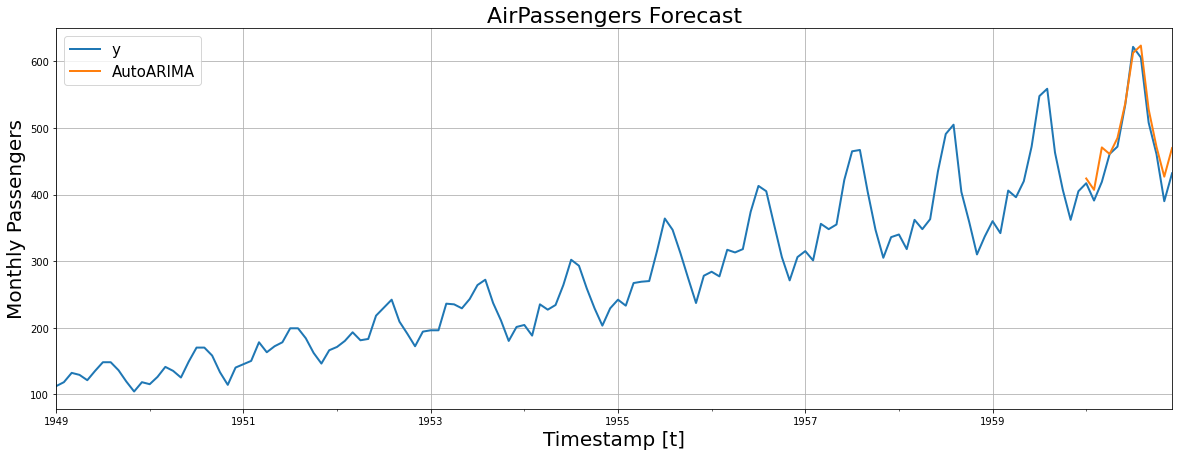

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df[['y', 'AutoARIMA']].plot(ax=ax, linewidth=2)

ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()